In [1]:
import sys
sys.path.append('../..')

In [2]:
from astropy import units as u
from IPython.display import Image

In [3]:
from gunagala.imager import create_imagers
from pocs.utils import hdr

# Create Imager objects from performance.yaml config file

In [4]:
imagers = create_imagers()

# Create a sequence of exposures using an Imager object

In [5]:
imager = imagers['canon_sbig_dark']

In [6]:
exposure_parameters = {'filter_name': 'g',
                       'bright_limit': 10  * u.ABmag,
                       'exp_time_ratio': 2,
                       'longest_exp_time': 300 * u.second,
                       'num_long_exp': 1}

In [7]:
explist = imager.exp_time_sequence(**exposure_parameters)
explist

<Quantity [   2.34,   4.69,   9.38,  18.75,  37.5 ,  75.  , 150.  , 300.  ] s>

# Calculate total exposure time and total elapsed time

In [8]:
explist.sum()

<Quantity 597.66 s>

In [9]:
imager.total_elapsed_time(explist)

<Quantity 633.66 s>

# Calculate point saturation limits

In [10]:
imager.point_source_saturation_mag(explist, filter_name='g')

<Magnitude [  9.71580744, 10.47084343, 11.22370491, 11.97627359,
             12.72999529, 13.48486735, 14.2420511 , 15.00390273] mag(AB)>

# Plot point source SNR versus magnitude

In [11]:
mags, snrs = imager.snr_vs_ABmag(explist, filter_name='g', plot='snr_vs_mag_example.png')

/mnt/data/ajh/Documents/virtualenvs/python3.5.2/lib/python3.5/site-packages/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in true_divide
  *arrays, **kwargs)


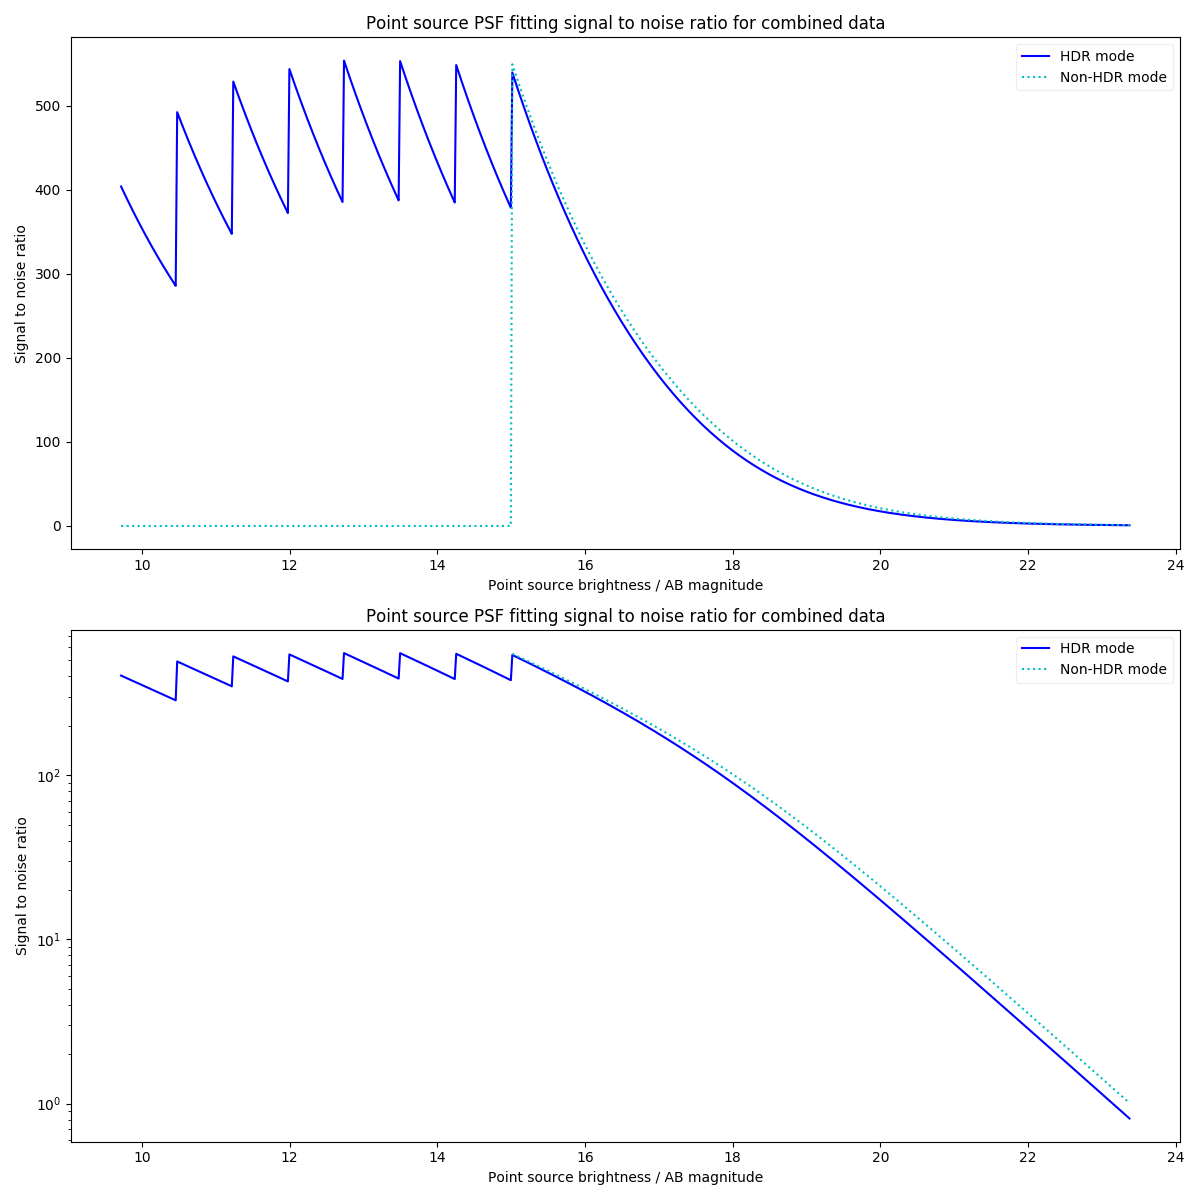

In [12]:
Image('snr_vs_mag_example.png')

# Generates a list of target details for a sequence of dithered, HDR exposures

In [13]:
name = 'M6 Toll'
base = "16h52m42.2s -38d37m12s"

target_list = hdr.get_target_list(target_name=name,
                                  imagers=imagers,
                                  primary_imager='canon_sbig_dark',
                                  base_position=base,
                                  exposure_parameters=exposure_parameters)
target_list

[{'exp_time': (2.34,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h52m35.6398s -38d38m41.6316s',
  'priority': 100},
 {'exp_time': (4.69,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h52m27.7953s -38d06m05.7551s',
  'priority': 100},
 {'exp_time': (9.38,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h55m08.4081s -38d04m52.89s',
  'priority': 100},
 {'exp_time': (18.75,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h55m01.0843s -38d39m57.3371s',
  'priority': 100},
 {'exp_time': (37.5,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h55m31.6281s -39d08m06.3379s',
  'priority': 100},
 {'exp_time': (75.0,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h52m52.5959s -39d06m56.6139s',
  'priority': 100},
 {'exp_time': (150.0,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h50m05.5875s -39d08m39.4386s',
  'priority': 100},
 {'exp_time': (300.0,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h4